# Notebook 3:  Redes de Kohonen y SOM (Self organized maps)
En este notebook vamos a implementar el algoritmo de clustering SOM en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Recuerde instala previamente el paquete kohonen en R.



In [1]:
#SOM example using wines data set
library(kohonen)
set.seed(7)
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
datos <- as.data.frame(datos)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

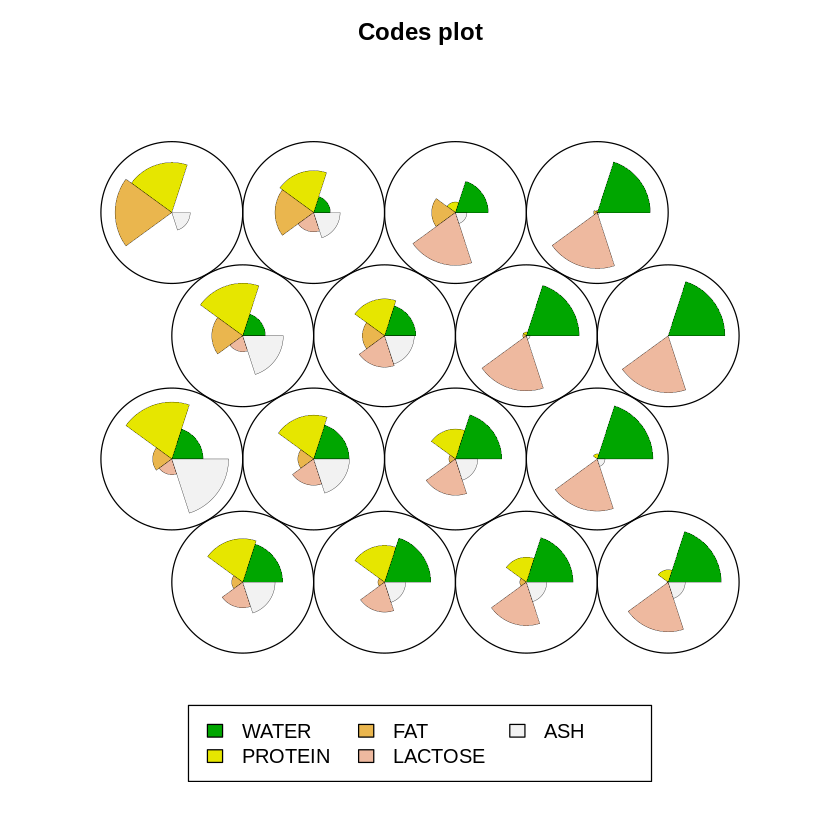

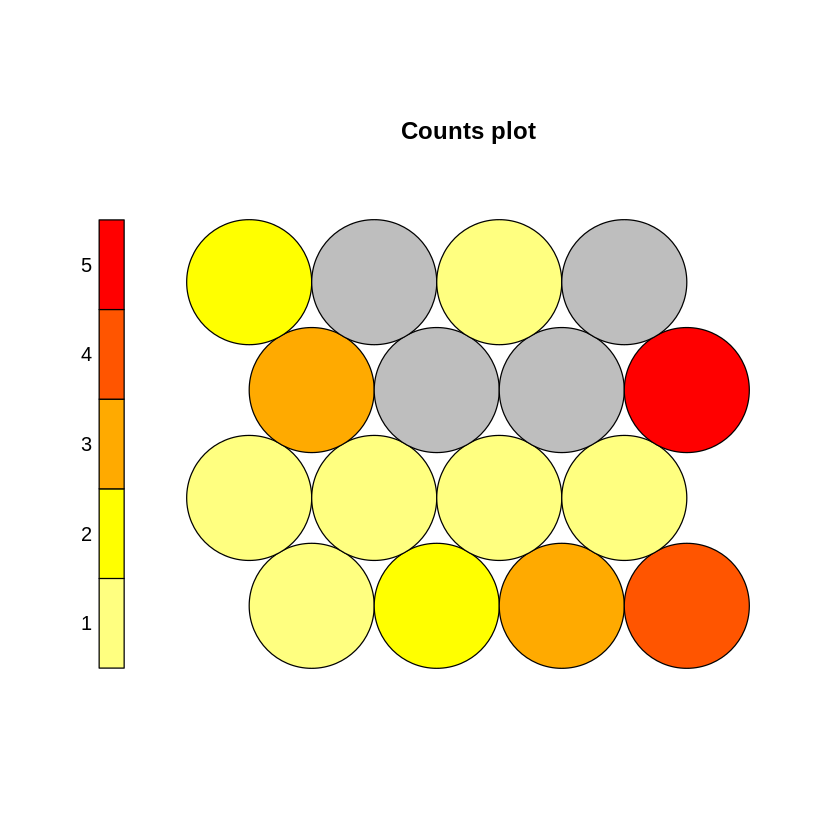

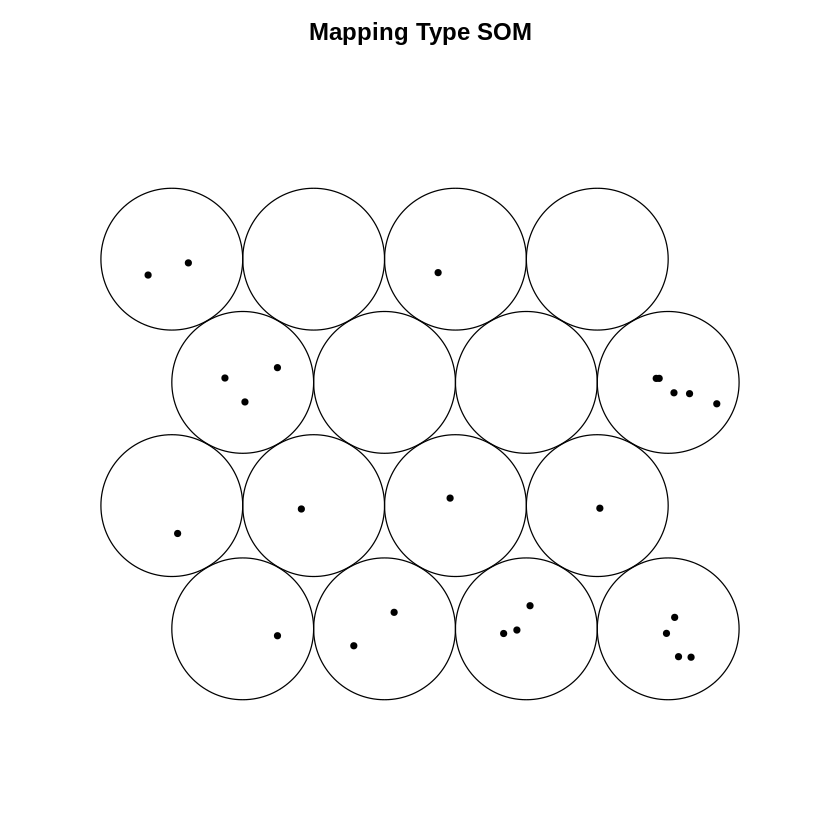

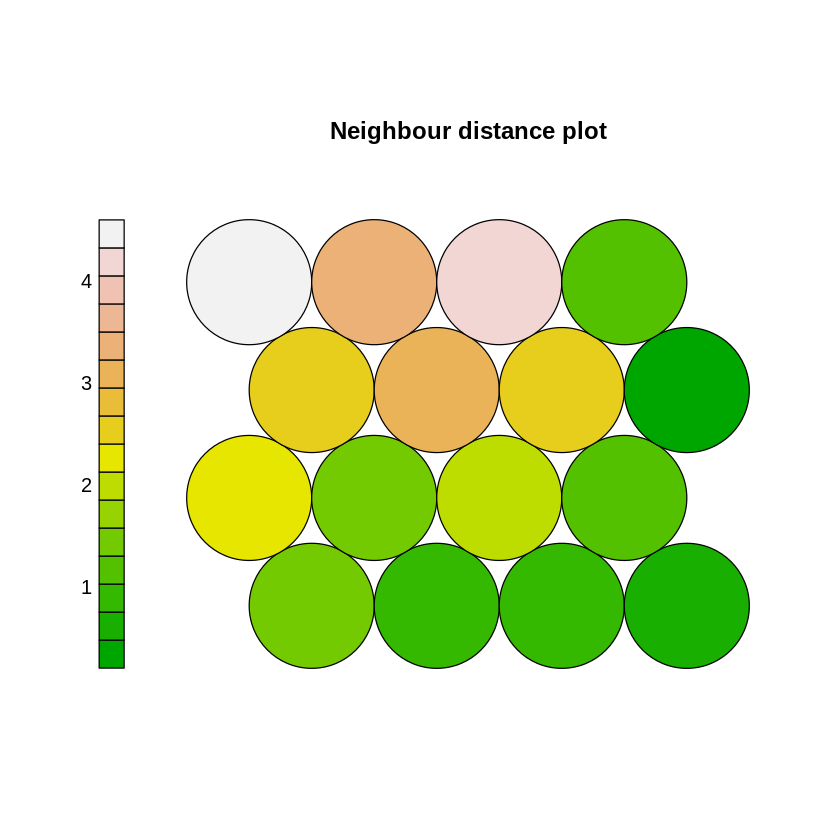

In [51]:
#create SOM grid
sommap <- som(scale(datos), grid = somgrid(4, 4, "hexagonal"))              #1
plot(sommap)                                                                #2
colors <- function(n, alpha = 1) {                                          #3
    rev(heat.colors(n, alpha))
}
plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)        #4
plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")        #5
plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)       #6


Ejercicio 1: <br>
<b>a)</b> Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.<br>
<b>#1</b> Se crea una grilla SOM hexagonal con los datos normalizados de 2X2
<br><b>#2</b> Plot por defecto de un objeto SOM. En el centro de cada celda de la grilla se imprime un pie-chart con las distintas etiquetas del dataset, estos pie-chart muestran la representatividad de cada etiqueta con el radio asignado a cada una, también se puede ver como un vector que se conoce como el vector de representatividad.
<br><b>#3</b> Inversa de la función de calor.
<br><b>#4</b> Plot que pinta las celdas de la grilla según la cantidad de individuos que estan incluidos en ella, en este caso los pinta según la función de color descrita en #3. El parametro heatkey especifica si se debe imprimir o no la escala.
<br><b>#5</b> Plot que imprime a cada individuo en su celda dependiendo según que tan cerca esta del vector que representa la celda. pchs es la forma del puntero.
<br><b>#6</b> Plot que pinta las celdas de la grilla la distancia de sus miembros al resto. Esto permite visualizar que tan distanciadas estan las etiquetas en el espacio dimensional superior.
<br>
<b>b)</b> Modifique parámetros de entrada. Interprete y comente los resultados obtenidos.
<br>Dentro del grid si se cambian los primeros dos parametros se modifica el tamaño de la grilla en la que son agrupados los datos. El tercer parametro corresponde a la forma que tomara la grilla "rectangular" toma una forma rectangular y "hexagonal" toma forma de panal.

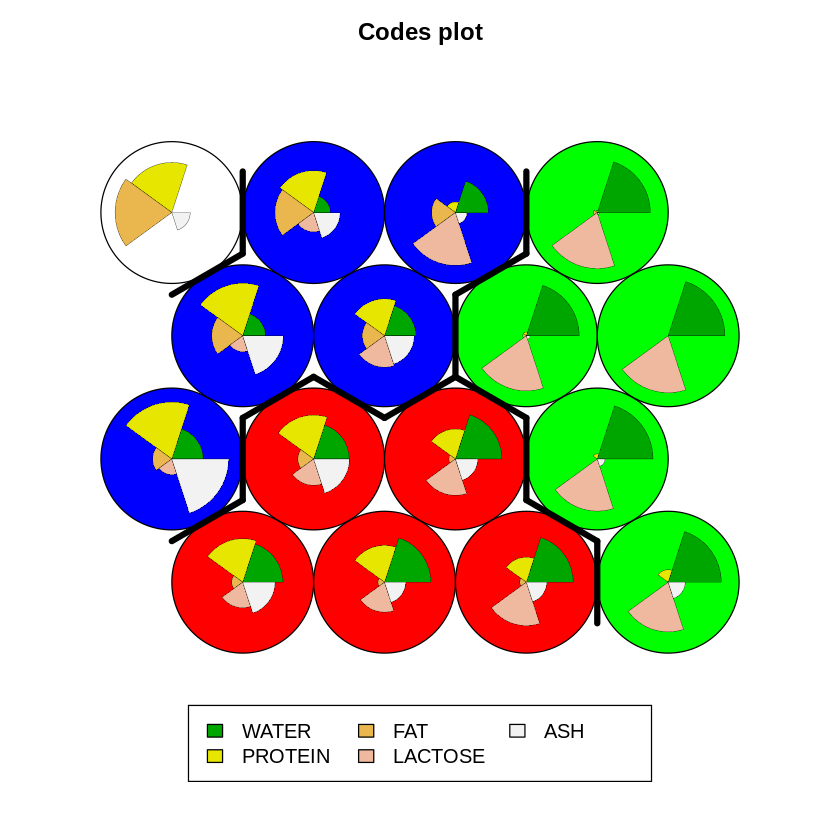

In [67]:
library(mclust)
mat <- matrix(sommap$codes[[1]], ncol=5,nrow=16,byrow=FALSE)                      #1
#sommap$codes[[1]]
#mat
## use hierarchical clustering to cluster the codebook vectors
groups<-3                                                                         #2
#som.hc <- cutree(hclust(dist(mat)), groups)                                       #3
som.hc <- Mclust(mat, G=4)$classification                                         #3.5
#plot
plot(sommap, type="codes", bgcol=rainbow(groups)[som.hc])                         #4

#cluster boundaries
add.cluster.boundaries(sommap, som.hc)                                            #5


Ejercicio 2: 
<br><b>a)</b> Explique como funciona esta nueva visualización.
<br><b>#1 </b> Se crea una matriz con tantas columnas como caracteristicas y filas como celdas existen en la grilla para que cada fila corresponda a uno de los vectores representativos.
<br><b>#2 </b> Cantidad de clusters.
<br><b>#3 </b> Se utiliza hclust sobre la matriz de disimilaridad de la matriz obtenida en #1 y se coorta el arbol de forma que hayan 3 clusters.
<br><b>#4 </b> Plot que imprime los pie-chart de cada celda y ademas pinta el fondo de cada celda según el cluster con la paleta de colores rainbow.
<br><b>#5 </b> Plot que agrega lineas limitrofes entre clusters al plot descrito en #4.
<br><b>b)</b> Interprete y comente los resultados obtenidos.
Al aumentar el número de celdas de la grilla se sigue viendo un perentezco entre las pie-chart de cada cluster (vectores de representatividad).

Ejercicio 3: 
<br><b>a) </b>Proponga un nuevo conjunto de datos a los cuales aplicar este algoritmo. Justifique su elección
<br>Utilicé iris.csv, porque es el que tenía más a mano y porque se sabe que tiene 3 clases bien definidas, además de que me pareció más entretenido ver la diferencia entre los mapas clusterizados con hclust vs mclust.
<br><b>b) </b>Realice las estimaciones y discuta sus resultados.
<br>Pensé que no habría gran diferencia entre los clusters generados por hclust y mclust, ya que el preprocesado lo hace SOM y aunque en algunos casos se parezcan, la mayoría son bastante distintos, esta diferencia sea hace más notoria cuando se aumenta la cantidad de celdas.

In [153]:
library(mclust)
datos1 <-read.csv("iris.csv", header = TRUE, sep = ",")
datos1 <- as.data.frame(datos1)
clas<-datos1[5]
datos1<-datos1[1:4]

#sommap <- som(scale(datos1), grid = somgrid(150, 1, "hexagonal"))
#mat <- matrix(sommap$codes[[1]], ncol=4,nrow=150 ,byrow=FALSE)
#sommap <- som(scale(datos1), grid = somgrid(25, 6, "hexagonal"))
#mat <- matrix(sommap$codes[[1]], ncol=4,nrow=150 ,byrow=FALSE)
sommap <- som(scale(datos1), grid = somgrid(3, 5, "hexagonal"))
mat <- matrix(sommap$codes[[1]], ncol=4,nrow=15 ,byrow=FALSE)


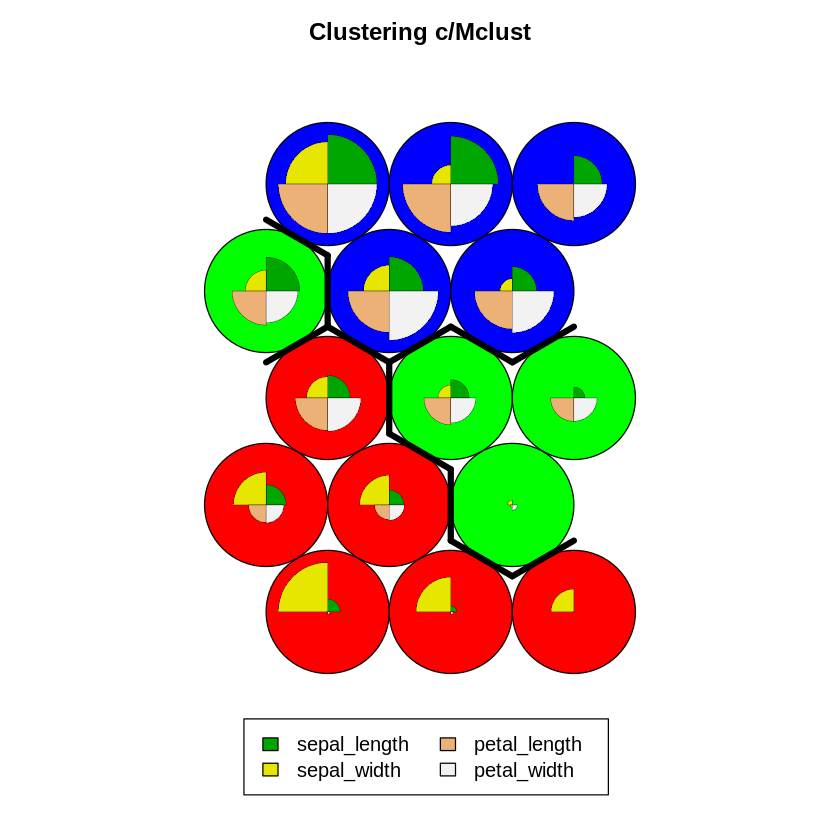

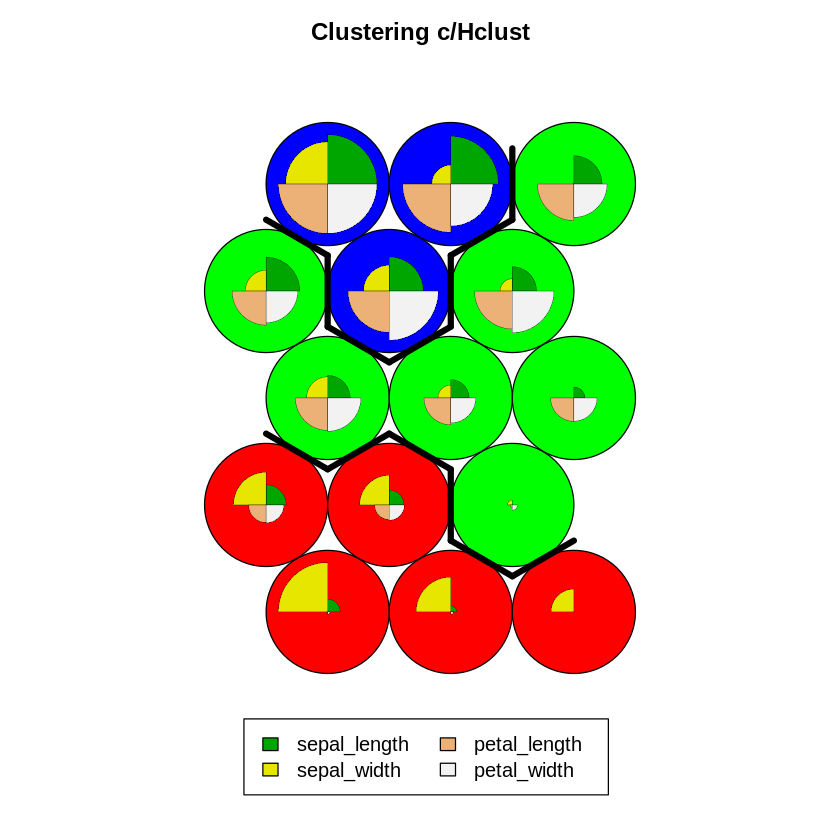

In [154]:
Msom <- Mclust(mat, G=3)$classification
plot(sommap, type="codes", bgcol=rainbow(groups)[Msom], main="Clustering c/Mclust")
add.cluster.boundaries(sommap, Msom)

Hsom <- cutree(hclust(dist(mat)), 3)
plot(sommap, type="codes", bgcol=rainbow(groups)[Hsom], main="Clustering c/Hclust")
add.cluster.boundaries(sommap, Hsom)